# Example Code from Lecture 14

The following notebook contains examples of Python code for cluster validation and hierarchical clustering algorithms.

# Cluster Validation

In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv',header='infer')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [2]:
Y = (data['class'] == 'tested_positive')*1
X = data.drop('class',axis=1)

In [3]:
from sklearn import cluster, metrics

k_means = cluster.KMeans(n_clusters = 2)
k_means.fit(X)
metrics.confusion_matrix(Y,k_means.labels_)

array([[ 79, 421],
       [ 86, 182]], dtype=int64)

In [4]:
metrics.adjusted_rand_score(Y,k_means.labels_)

0.074386955475290936

# Hierarchical Clustering

In [5]:
import pandas as pd

data = pd.read_csv('animals.csv',header='infer')
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
data[:10]

,Name,warmBlooded,coldBlooded,GiveBirth,LayEggs,CanSwim,CanFly,HasLegs,HasScales,Class
0,human,1,0,1,0,0,0,1,0,mammal
1,python,0,1,0,1,0,0,0,1,reptile
2,salmon,0,1,0,1,1,0,0,1,fish
3,whale,1,0,1,0,1,0,0,0,mammal
4,frog,0,1,0,1,1,0,1,0,amphibian
5,komodo dragon,0,1,0,1,0,0,1,1,reptile
6,bat,1,0,1,0,0,1,1,0,mammal
7,pigeon,1,0,0,1,0,1,1,0,bird
8,cat,1,0,1,0,0,0,1,0,mammal
9,leopard shark,0,1,1,0,1,0,0,1,fish


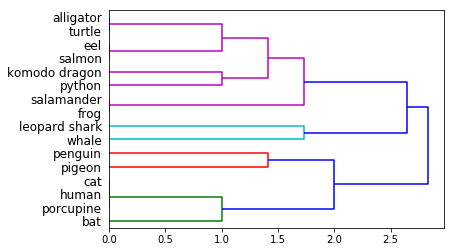

In [6]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series

Z = hierarchy.linkage(X.as_matrix(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In [7]:
Z = hierarchy.linkage(X.as_matrix(), 'complete')
threshold = 1.1
labels = hierarchy.fcluster(Z, threshold)
labels

array([1, 4, 5, 2, 3, 4, 1, 1, 1, 2, 6, 1, 1, 5, 3, 6], dtype=int32)

In [8]:
metrics.adjusted_rand_score(Y,labels)

0.44117647058823528

In [9]:
Z = hierarchy.linkage(X.as_matrix(), 'complete')
threshold = 1.0
labels = hierarchy.fcluster(Z, threshold)
labels

array([1, 5, 6, 3, 4, 5, 1, 2, 1, 3, 7, 2, 1, 6, 4, 7], dtype=int32)

In [10]:
metrics.adjusted_rand_score(Y,labels)

0.61805555555555558